In [1]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF # decomposition 모든 차원 축소가 포함됨

In [28]:
data = fetch_20newsgroups(remove=('headers', 'footers', 'quotes')).data # 머리말, 꼬리말 등 가져오지 않음

In [31]:
# text -> tf-idf weighted term-document matrix
vectorlizer = TfidfVectorizer(max_features=2000, min_df=10, stop_words='english')
x = vectorlizer.fit_transform(data)
idx_to_word = np.array(vectorlizer.get_feature_names())
print(x)

  (0, 1107)	0.13596515131134768
  (0, 1082)	0.1439640091285723
  (0, 944)	0.16068505607893963
  (0, 897)	0.16927150728890597
  (0, 1993)	0.1274990882101728
  (0, 667)	0.19413995565094086
  (0, 1188)	0.17648781190400797
  (0, 1009)	0.09424560560725692
  (0, 321)	0.17513150125349702
  (0, 1558)	0.1651151431885443
  (0, 1638)	0.19781957502373113
  (0, 160)	0.190572546028195
  (0, 1687)	0.153503242191245
  (0, 1500)	0.12154002727766956
  (0, 361)	0.14279390121865662
  (0, 638)	0.1714763727922697
  (0, 1023)	0.18711856186440218
  (0, 1081)	0.18303366583393096
  (0, 621)	0.2009979730339519
  (0, 544)	0.14249215589040326
  (0, 1600)	0.17201525862610714
  (0, 369)	0.630558141606117
  (0, 1966)	0.1855076564575762
  (1, 1817)	0.11113849799537662
  (1, 873)	0.15822575329907268
  :	:
  (11312, 1746)	0.2391477981479836
  (11312, 1711)	0.39611960235510485
  (11312, 1475)	0.1839292570975713
  (11312, 1242)	0.2458009890045144
  (11312, 1884)	0.2006451645457405
  (11312, 1982)	0.183845539553728
  (1131

In [4]:
# newsgroups_train = fetch_20newsgroups(subset ='train')
# print(list(newsgroups_train.target_names))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [32]:
nmf = NMF(n_components=20, solver='mu')
W = nmf.fit_transform(x)
H = nmf.components_
print(W)
print(H)

[[1.12709732e-06 2.37435894e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.77858650e-04]
 [8.26647957e-03 1.05682235e-02 0.00000000e+00 ... 0.00000000e+00
  3.62184004e-04 1.35084779e-03]
 [4.78419984e-02 3.77356414e-02 0.00000000e+00 ... 8.15242529e-07
  2.11248678e-05 0.00000000e+00]
 ...
 [9.33857938e-03 1.64693568e-03 0.00000000e+00 ... 8.08285247e-06
  1.55699451e-12 1.12021555e-05]
 [2.53182373e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.84967795e-03]
 [7.52240605e-03 1.10896588e-02 0.00000000e+00 ... 1.13756950e-04
  1.95268254e-04 1.38853642e-07]]
[[2.90686961e-20 4.77923010e-02 6.60689570e-05 ... 9.00132856e-02
  5.37529187e-10 2.27077688e-02]
 [3.02153849e-14 0.00000000e+00 8.82168285e-04 ... 0.00000000e+00
  9.88444600e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.59853724e-16 0.00000000e+00]
 ...
 [1.05889814e-21 7.50172116e-02 3.44421795e-14 ... 2.47105992e-02
  0.00000000e+00 7.93872570e-02]

In [33]:
for i, topic in enumerate(H):
    print("Topic {}: {}".format(i + 1, ","
                               .join([str(x) for x in idx_to_word[topic.argsort()][-10:]])))

Topic 1: ll,say,way,really,right,did,ve,people,good,time
Topic 2: appreciated,ftp,information,need,program,looking,software,use,help,mail
Topic 3: lord,church,christians,christian,believe,faith,christ,bible,jesus,god
Topic 4: algorithm,public,use,escrow,government,keys,clipper,encryption,chip,key
Topic 5: hd,cd,floppy,controller,ide,hard,disk,drives,scsi,drive
Topic 6: 15,20,price,condition,offer,shipping,10,new,sale,00
Topic 7: using,program,ms,problem,window,running,files,dos,file,windows
Topic 8: teams,win,hockey,play,season,players,year,games,team,game
Topic 9: colorado,pub,cc,university,cs,soon,banks,gordon,pitt,edu
Topic 10: oil,new,speed,good,dealer,miles,engine,bike,cars,car
Topic 11: ram,color,bus,driver,vga,cards,drivers,monitor,video,card
Topic 12: getting,exactly,exist,work,new,doesn,mean,anybody,know,does
Topic 13: appreciate,got,wondering,info,tell,ve,hi,mail,advance,thanks
Topic 14: believe,guns,government,good,think,want,gun,people,know,don
Topic 15: thought,know,wanted

## 문서의 유사도 검사

In [34]:
# 20개의 뉴스그룹, 18000 이상의 포스팅
# 이메일 (text), subject, header, contents ...
import io # 문자열 불러오고 파싱하는데 효율적
import pandas as pd

newsgroups_train = fetch_20newsgroups(subset='train')
print(newsgroups_train.data[1])

From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>



In [37]:
def parseDocument(data): # 필요한 문자열을 검색하기 위한 용도로 사용
    buf = io.StringIO(data)
    line = buf.readline()
    data = []
    subject = ''
    while line:
        if (line.startswith('Subject')):
            subject = line[8:].strip() # Subject
        elif (line.startswith('Lines:')): # Lines
            lines = line[6:] #Lines: 이후부터 데이터를 잡는다는 의미
            while line:
                line = buf.readline()
                data.append(line.strip())
        line = buf.readline()
    text = ''.join(data)
        
    return subject, text

In [39]:
textlist = []
df = pd.DataFrame(columns=['text'])
for data in newsgroups_train.data[0:1000]:
    subject, text = parseDocument(data)
    df.loc[subject]=text
df.head()

,text
WHAT car is this!?,I was wondering if anyone out there could enli...
SI Clock Poll - Final Call,NNTP-Posting-Host: carson.u.washington.eduA fa...
PB questions...,"well folks, my mac plus finally gave up the gh..."
Re: Weitek P9000 ?,Distribution: worldNNTP-Posting-Host: amber.ss...
Re: Shuttle Launch Question,In article <15APR199320340428@stdvax> abdkw@st...


In [40]:
# Tfidf를 이용해서 단어 백터화
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df['text'].tolist())
print(vectors.shape)

(863, 37139)


In [41]:
# NMF를 이용해서 특성 추출
nmf = NMF(n_components=50)
nmf.fit(vectors)

NMF(n_components=50)

In [12]:
features = nmf.transform(vectors)

In [13]:
print(features[0])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 4.60079276e-02
 4.20965584e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.02511957e-09 1.38377564e-02 2.28188164e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.60874036e-07 0.00000000e+00 0.00000000e+00 1.00037401e+00
 0.00000000e+00 4.98256222e-06 8.62597960e-08 0.00000000e+00
 6.18839866e-02 2.77256183e-04 0.00000000e+00 4.09948939e-06
 4.90700310e-06 6.01780459e-06 0.00000000e+00 3.13952062e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.48249705e+03
 0.00000000e+00 0.00000000e+00 6.29589318e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.99130841e-05
 0.00000000e+00 1.61466489e-03]


In [20]:
# Features -> 정규화 (Normalizer)
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
norm_features = normalizer.fit_transform(features)
print(norm_features[0])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 6.14873977e-06
 5.62600396e-10 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.05228452e-13 1.84935005e-06 3.04962582e-11 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.15000464e-11 0.00000000e+00 0.00000000e+00 1.33695208e-04
 0.00000000e+00 6.65895641e-10 1.15282097e-11 0.00000000e+00
 8.27049922e-06 3.70539645e-08 0.00000000e+00 5.47877176e-10
 6.55797526e-10 8.04250840e-10 0.00000000e+00 4.19581936e-06
 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.99999991e-01
 0.00000000e+00 0.00000000e+00 8.41416051e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.66128858e-09
 0.00000000e+00 2.15792250e-07]


In [15]:
df_features = pd.DataFrame(features, index=df.index.tolist())
df_features.head(10)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
WHAT car is this!?,0.000000,0.000000,0.000000e+00,4.600793e-02,0.000004,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.006296,0.0000,0.000000,0.0,0.00000,0.000020,0.000000e+00,1.614665e-03
SI Clock Poll - Final Call,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,4.818328e-02,0.000000,2.456377e-06,0.000000e+00,4.835097e-07,...,0.000000,0.000000,0.007778,0.0000,0.000000,0.0,0.00000,0.000026,0.000000e+00,0.000000e+00
PB questions...,0.299588,0.920096,3.015964e-06,0.000000e+00,0.000012,0.000000e+00,0.000000,5.922907e-06,0.000000e+00,0.000000e+00,...,0.000000,0.000009,0.000371,0.0000,0.000000,0.0,0.22614,0.000006,0.000000e+00,1.037079e-03
Re: Weitek P9000 ?,0.000000,0.000128,8.356610e-06,0.000000e+00,0.047559,0.000000e+00,0.000000,0.000000e+00,3.469948e-02,0.000000e+00,...,0.000000,0.000000,0.001881,0.0392,0.000000,0.0,0.00000,0.000000,1.574187e-06,7.284415e-03
Re: Shuttle Launch Question,0.112029,0.000457,0.000000e+00,6.721130e-06,0.024873,0.000000e+00,0.070951,8.152572e-05,1.626274e-05,0.000000e+00,...,0.000000,0.003392,0.000594,0.0000,0.076053,0.0,0.00000,0.000347,0.000000e+00,3.298356e-07
Re: Rewording the Second Amendment (ideas),0.000000,0.000000,0.000000e+00,0.000000e+00,0.000006,0.000000e+00,0.000000,6.606175e-07,5.264664e-08,1.146425e-06,...,1.834298,0.000017,0.001662,0.0000,0.000000,0.0,0.00000,0.000004,6.257844e-07,1.267713e-07
Brain Tumor Treatment (thanks),0.000005,0.000005,2.631015e-07,9.069479e-08,0.000000,3.511774e-07,0.000000,9.163103e-02,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.00000,0.000000,0.000000e+00,0.000000e+00
Re: IDE vs SCSI,0.000000,0.000000,1.072977e-01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000600,0.0000,0.000000,0.0,0.00000,0.000000,8.167259e-03,3.057676e-03
WIn 3.0 ICON HELP PLEASE!,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.023913e-01,...,0.000000,0.000000,0.000994,0.0000,0.000000,0.0,0.00000,0.132178,0.000000e+00,0.000000e+00
Re: Sigma Designs Double up??,0.143649,0.000000,3.626309e-06,0.000000e+00,0.000018,0.000000e+00,0.000000,5.743175e-06,0.000000e+00,3.409582e-06,...,0.000000,0.189261,0.000472,0.0000,0.000000,0.0,0.00000,0.028348,0.000000e+00,3.851258e-02


In [21]:
df_features = pd.DataFrame(norm_features, index = df.index.tolist())

## 문서 유사도 계산 (코사인 유사도)


In [22]:
article = df_features.loc['WHAT car is this!?'] # 문장과 유사한 문서를 검색
similarities = df_features.dot(article) # 각 문서의 특성 행렬과 article 문서의 특성 행렬 곱하기
top = similarities.nlargest() # 큰 값순으로 정렬
print(top.index)

Index(['WHAT car is this!?', 'Re: Sigma Designs Double up??',
       'Re: Weitek P9000 ?', 'Re: Rewording the Second Amendment (ideas)',
       'SI Clock Poll - Final Call'],
      dtype='object')


In [23]:
texts = df.loc[top.index]['text'].tolist()
i = 0
for text in texts:
    print('TITLE: ' + top.index[i] + " Similarities: " + str(top[i]))
    i += 1

TITLE: WHAT car is this!? Similarities: 1.0000000000000002
TITLE: Re: Sigma Designs Double up?? Similarities: 0.9999999862820982
TITLE: Re: Weitek P9000 ? Similarities: 0.9999999827744332
TITLE: Re: Rewording the Second Amendment (ideas) Similarities: 0.9999999687546008
TITLE: SI Clock Poll - Final Call Similarities: 0.9999999677599106


## 얼굴이미지

In [42]:
import mglearn
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
x_people = people.data[mask]
y_people = people.target[mask]

# Scaler -> StandardScaler, MIxMaxScaler, (0-1: /255)
x_people = x_people / 255.

x_train, x_test, y_train, y_test = train_test_split(x_people, y_people, stratify=y_people, random_state=0)

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.827451, ..., 0.168627],
       ...,
       [0.447059, ..., 0.79085 ]], dtype=float32), 
array([[0.909804, ..., 0.484967],
       ...,
       [0.607843, ..., 0.820915]], dtype=float32))


C:\Users\shanolulu\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\shanolulu\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\shanolulu\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\shanolulu\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reach

______________________________________________________nmf_faces - 591.7s, 9.9min


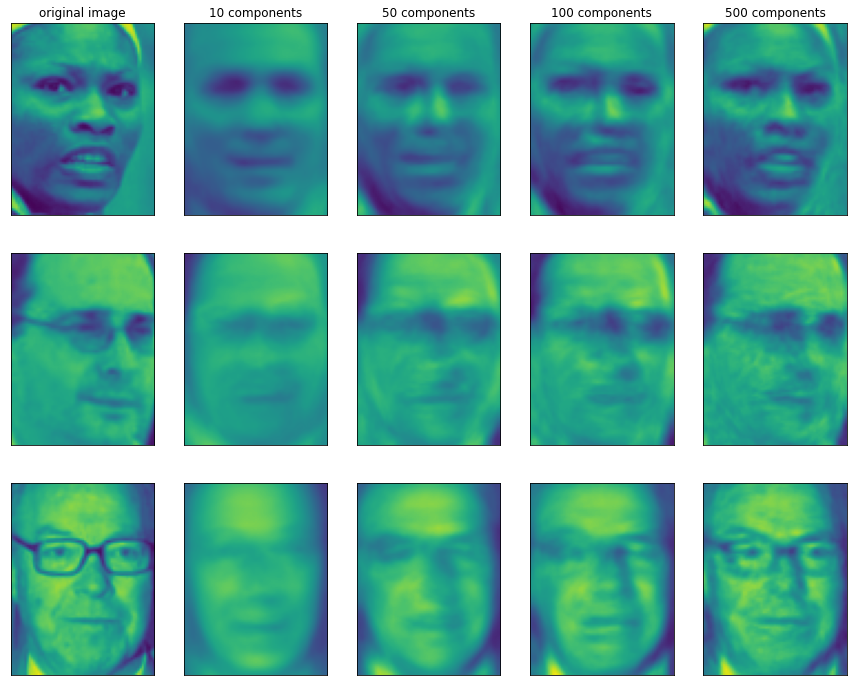

In [43]:
mglearn.plots.plot_nmf_faces(x_train, x_test, image_shape)

In [44]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(x_train)
x_train_nmf = nmf.transform(x_train)
x_test_nmf = nmf.transform(x_test)

C:\Users\shanolulu\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


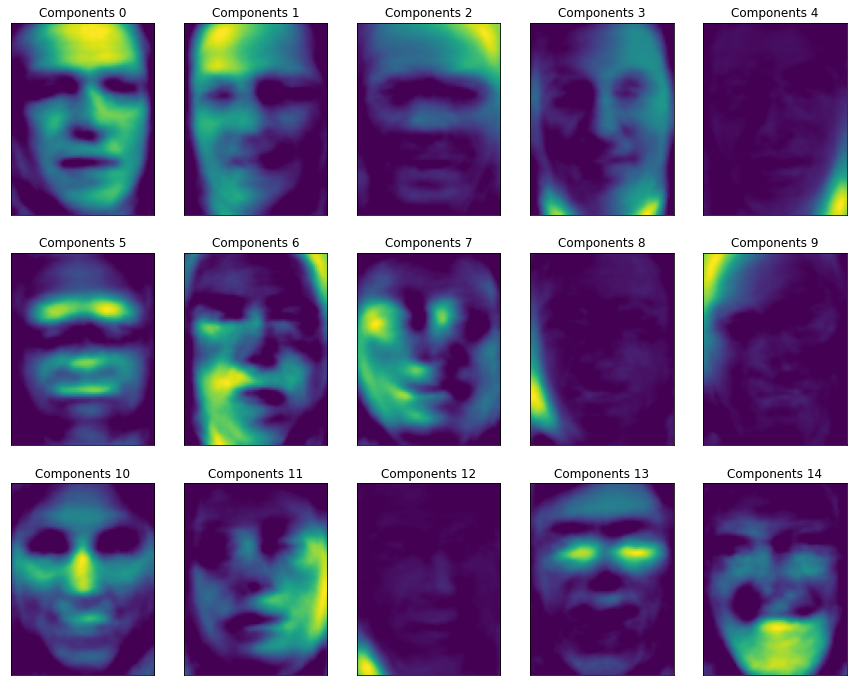

In [45]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 5, figsize=(15,12), subplot_kw={'xticks':(),'yticks':()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title('Components {}'.format(i))

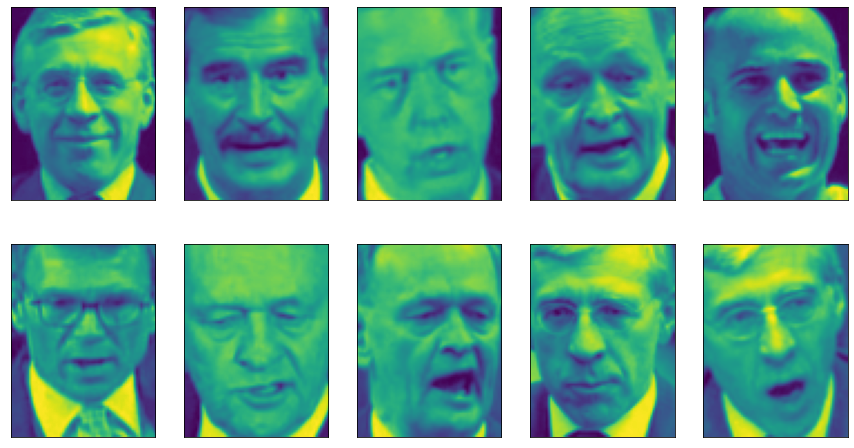

In [46]:
compn = 3
inds = np.argsort(x_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks':(),'yticks':()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(x_train[ind].reshape(image_shape))

Text(0, 0.5, 'signal')

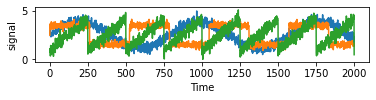

In [47]:
s = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(s, '-')
plt.xlabel('Time')
plt.ylabel('signal')

In [49]:
a = np.random.RandomState(0).uniform(size=(100,3))
x = np.dot(s, a.T)
print('측정 데이터 형태: ', x.shape)

측정 데이터 형태:  (2000, 100)


In [50]:
nmf = NMF(n_components=3, random_state=12)
s_ = nmf.fit_transform(x)
print('복원된 신호 데이터 형태: ', s_.shape)

복원된 신호 데이터 형태:  (2000, 3)


C:\Users\shanolulu\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
h = pca.fit_transform(x)

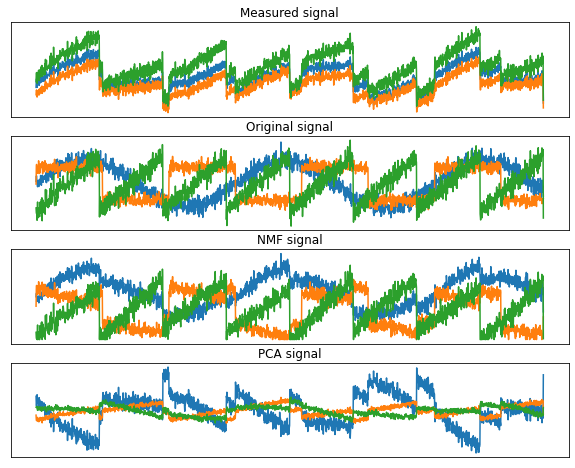

In [54]:
models = [x, s, s_, h]
names = ['Measured signal','Original signal','NMF signal','PCA signal']
fig, axes = plt.subplots(4, figsize=(10, 8), subplot_kw={'xticks':(),'yticks':()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')